In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4776,ham,Sorry completely forgot * will pop em round th...,NaN,NaN,NaN
3513,ham,I always chat with you. In fact i need money c...,NaN,NaN,NaN
2379,ham,"Good evening Sir, hope you are having a nice d...",NaN,NaN,NaN
1697,ham,Hai priya are you right. What doctor said pa. ...,NaN,NaN,NaN
1023,ham,May i call You later Pls,NaN,NaN,NaN
2749,ham,You said not now. No problem. When you can. Le...,NaN,NaN,NaN
3294,ham,Dunno lei Ì_ all decide lor. How abt leona? Oo...,NaN,NaN,NaN
3957,ham,So i could kiss and feel you next to me...,NaN,NaN,NaN
3161,ham,I can't describe how lucky you are that I'm ac...,NaN,NaN,NaN
2757,ham,Yo we are watching a movie on netflix,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning 
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment

## 1. DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last three coloumns
df.drop( columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(8)

,v1,v2
3880,ham,Can you plz tell me the ans. BSLVYL sent via f...
2999,ham,Id onluy matters when getting on from offcampus
329,ham,I'm reading the text i just sent you. Its mean...
634,spam,"Dear Voucher Holder, 2 claim this weeks offer,..."
1501,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
2078,spam,85233 FREE>Ringtone!Reply REAL
2963,spam,"Do you ever notice that when you're driving, a..."
589,ham,"I'm in a meeting, call me later at"


In [9]:
# renaming the coloumns
df.rename( columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [10]:
df.sample(8)

,target,text
3945,ham,How u doin baby girl ?? hope u are okay every ...
5546,ham,Ic. There are a lotta childporn cars then.
1023,ham,May i call You later Pls
1878,ham,I AM AT A PARTY WITH ALEX NICHOLS
2450,ham,K..give back my thanks.
55,ham,Do you know what Mallika Sherawat did yesterda...
571,ham,Do you know where my lab goggles went
5267,ham,Anything lar then Ì_ not going home 4 dinner?


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform( df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# is missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# checking duplicate values
df.duplicated().sum()

403

In [16]:
#removing duplicates
df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA (exploratory data analysis)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

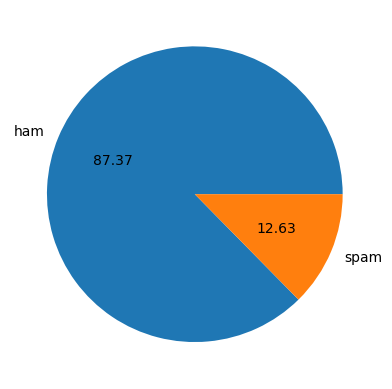

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [22]:
# data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dubey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# creating new coloumns for characters, words and sentences
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
# number of characters
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# number of words
df['num_words'] = df['text'].apply( lambda x: len( nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# number of sentences
df['num_sentences'] = df['text'].apply( lambda x: len( nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# for ham massages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# for spam massages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

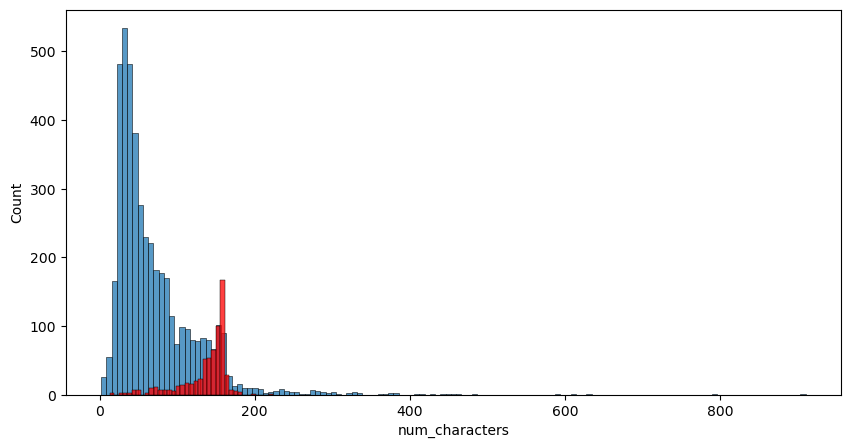

In [36]:
plt.figure( figsize = (10, 5))
sns.histplot(df[ df['target'] == 0]['num_characters'])
sns.histplot(df[ df['target'] == 1]['num_characters'], color = 'red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

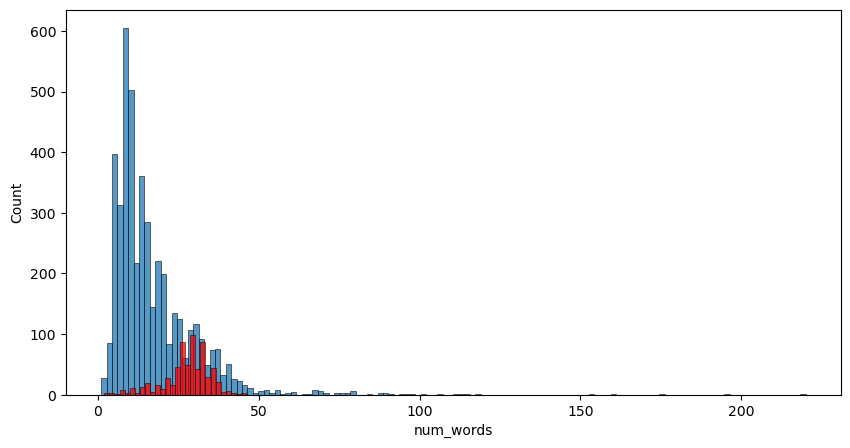

In [37]:
plt.figure( figsize = (10, 5))
sns.histplot(df[ df['target'] == 0]['num_words'])
sns.histplot(df[ df['target'] == 1]['num_words'], color = 'red')

<AxesSubplot: xlabel='num_sentences', ylabel='Count'>

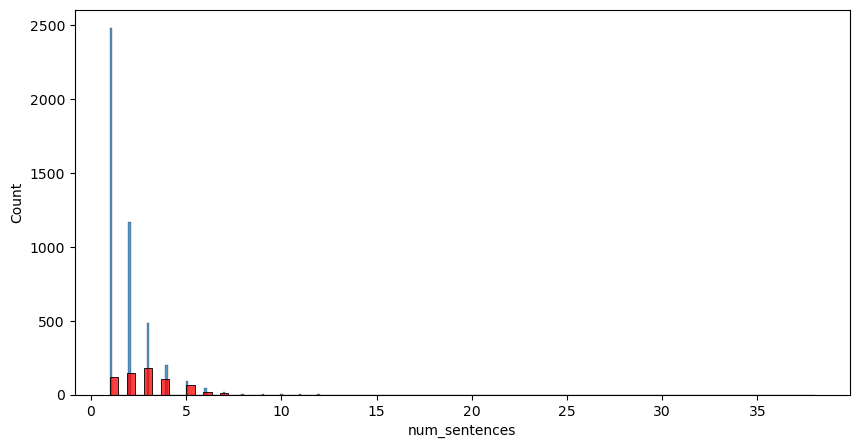

In [38]:
plt.figure( figsize = (10, 5))
sns.histplot(df[ df['target'] == 0]['num_sentences'])
sns.histplot(df[ df['target'] == 1]['num_sentences'], color = 'red')

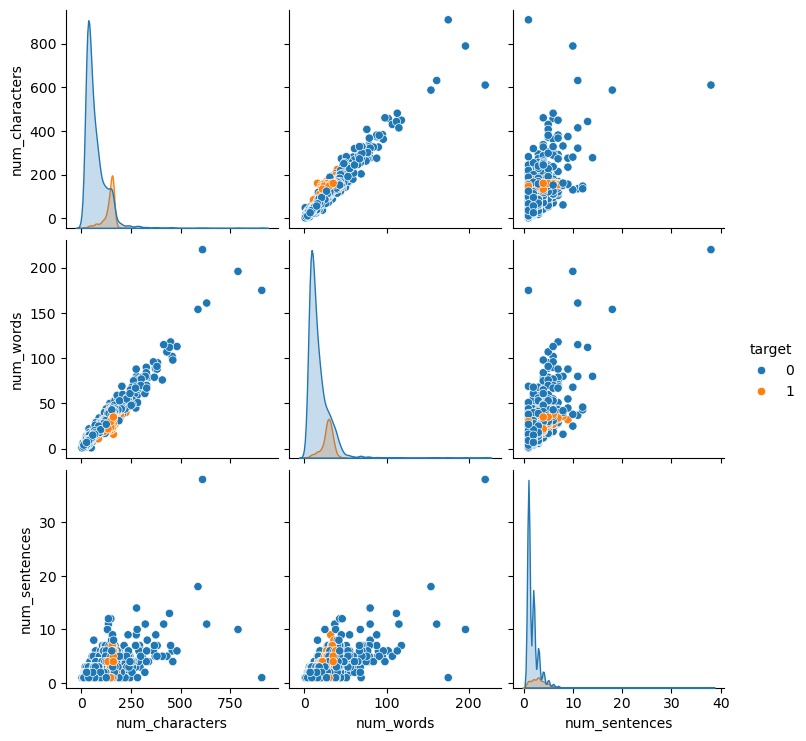

In [39]:
sns.pairplot( df, hue = 'target')

<AxesSubplot: >

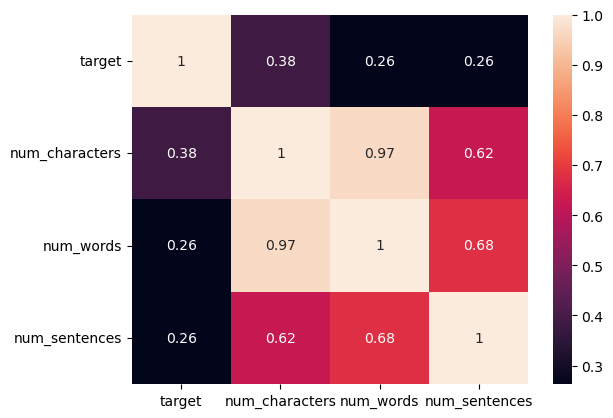

In [40]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

## 3. DATA PREPROCESSING
    # Lower case
    # Tokenization
    # Removing special characters
    # Removing stop words and punctuation
    # Stemming

In [41]:
def transform_text( text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y [:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y [:]
    y.clear()
    for i in text:
        y.append( ps.stem(i))
    
    return " ".join(y)

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [46]:
transform_text("Did U like my presentation on Machine Learning? Where are you studing?")

'u like present machin learn stude'

In [47]:
# adding new coloumns
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
# importing wordclouds 
from wordcloud import WordCloud
wc = WordCloud( width=500, height=500, min_font_size=10, background_color='white')

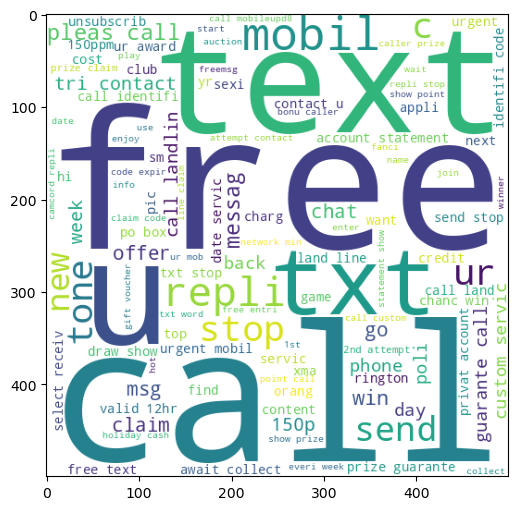

In [50]:
spam_wc = wc.generate( df[ df['target'] == 1]['transformed_text'].str.cat( sep =" ") )
plt.figure(figsize = (16, 6))
plt.imshow(spam_wc)

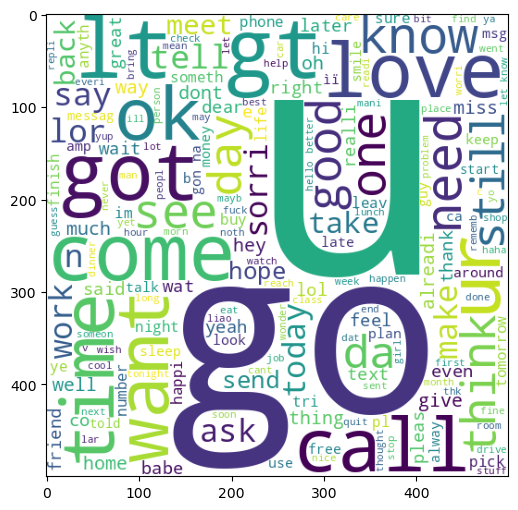

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat( sep =" "))
plt.figure(figsize = (16, 6))
plt.imshow(ham_wc)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus = []
for msg in df[ df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

/tmp/ipykernel_54893/2467206069.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=top_30_words, palette='viridis')


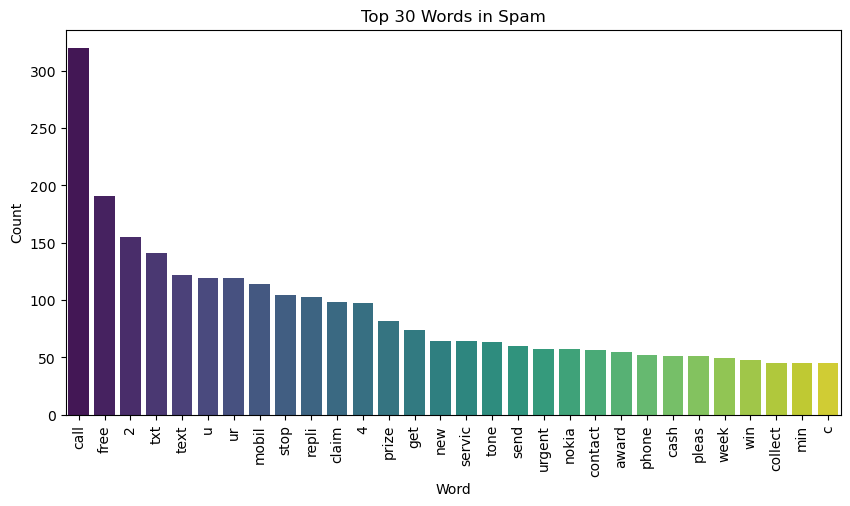

In [55]:
from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

word_counts = Counter(spam_corpus)
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)
top_30_words = df_word_counts.head(30)

plt.figure(figsize=(10, 5))
sns.barplot(x='Word', y='Count', data=top_30_words, palette='viridis')
plt.title('Top 30 Words in Spam')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[ df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

/tmp/ipykernel_54893/1772202397.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=top_30_words, palette='viridis')


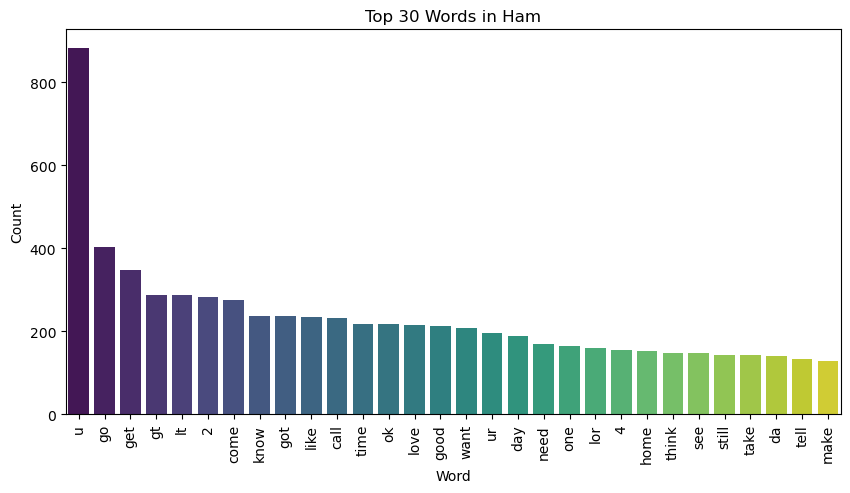

In [58]:
from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

word_counts = Counter(ham_corpus)
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)
top_30_words = df_word_counts.head(30)

plt.figure(figsize=(10, 5))
sns.barplot(x='Word', y='Count', data=top_30_words, palette='viridis')
plt.title('Top 30 Words in Ham')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

## 4. MODEL BUILDING

In [59]:
# we decide best suited model for our dataset 

In [173]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [174]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [196]:
# # for scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [197]:
X.shape

(5169, 3000)

In [198]:
y = df['target'].values

In [199]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
# we train our model using vectorize transformed_text and target_values
# and create test array for testing out model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [202]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [203]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [204]:
# particular model take X_train and give its predicted output that will compare with real output y_train

In [205]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print (accuracy_score(y_test, y_pred1))
print (confusion_matrix(y_test, y_pred1))
print (precision_score(y_test, y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [206]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print (accuracy_score(y_test, y_pred2))
print (confusion_matrix(y_test, y_pred2))
print (precision_score(y_test, y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [207]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print (accuracy_score(y_test, y_pred3))
print (confusion_matrix(y_test, y_pred3))
print (precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## 5. EVALUATION

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [209]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [210]:
clfs={
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BGC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
    }

In [211]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [212]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9690522243713733, 0.9274193548387096)

In [213]:
# loop for testing all algorithms

In [214]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("\nFor", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy 0.9690522243713733
Precision 0.9274193548387096

For KN
Accuracy 0.9052224371373307
Precision 0.9761904761904762

For NB
Accuracy 0.9787234042553191
Precision 0.9461538461538461

For DT
Accuracy 0.9294003868471954
Precision 0.8282828282828283

For LR
Accuracy 0.9671179883945842
Precision 0.9642857142857143

For RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829

For AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089

For BGC
Accuracy 0.9584139264990329
Precision 0.8682170542635659

For ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406

For GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192

For XGB
Accuracy 0.9671179883945842
Precision 0.9262295081967213


In [171]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [172]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,XGB,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BGC,0.958414,0.862595


## 6. IMPROVEMENT

In [112]:
# 1. we use max_feature function of TfidfVectorizer

In [194]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft': accuracy_scores, 'Precision_max_ft': precision_scores}).sort_values('Precision_max_ft', ascending=False)

In [195]:
performance_df.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft,Precision_max_ft
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BGC,0.958414,0.862595,0.958414,0.868217


In [139]:
# 2. we use scalling method

In [215]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scalling': accuracy_scores, 'Precision_scalling': precision_scores}).sort_values('Precision_scalling', ascending = False)

In [216]:
new_df = performance_df.merge(new_df, on='Algorithm')

In [217]:
new_df_scalled = new_df.merge(temp_df, on='Algorithm')

In [218]:
new_df_scalled

,Algorithm,Accuracy,Precision,Accuracy_scalling_x,Precision_scalling_x,Accuracy_scalling_y,Precision_scalling_y
0,KN,0.900387,1.000000,0.905222,0.976190,0.905222,0.976190
1,NB,0.959381,1.000000,0.978723,0.946154,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.969052,0.927419,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,XGB,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.967118,0.964286,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BGC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [220]:
# finally choosing algorithm

In [221]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))